In [1]:
import pandas as pd
import bz2
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

A continuación se exponen las rutas de los archivos del challenge.

In [3]:
path_search = r'C:\Users\adrgo\Downloads\searches.csv.bz2'
path_booking = r'C:\Users\adrgo\Downloads\bookings.csv.bz2'

# Carga de datos

Aunque hay diversas formas de cargar conjuntos de datos tan grandes, puede ser razonable, en un primer momento, cargarlos directamente mediante la librería pandas.read_csv para comprobar la diferencia de tiempos respecto a otros métodos, tales como el método chunksize o el empleo directo de la librería bz2.

In [4]:
%%time

search = pd.read_csv(path_search, sep = '^', compression='bz2')

Wall time: 3min 24s


In [5]:
search.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [6]:
%%time

booking = pd.read_csv(path_booking, sep = '^', compression='bz2')

Wall time: 2min 28s


In [7]:
booking.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


# Primer Ejercicio

Para contar el número de líneas de ambos archivos hay tres formas posibles de hacerlo. La primera es, habiendo cargado directamente los datos, calcular la longitud de los dataframes. Otra forma de hacerlo es mediante una  función que abra los archivos mediante with y luego contar cada línea mediante un bucle. Por último, puede cargarse el dataframe dividido mediante el método chunksize y calcular la suma de la longitud de cada fragmento individual. Todos los métodos tienen un tiempo aproximado, si se cuenta el periodo desde que se cargan los datos hasta que se obtiene el valor buscado.

Primeramente, y ya que se ha cargado inicialmente el archivo de forma directa, se medirá la longitud de cada dataframe.

In [8]:
len(search)

20390198

In [9]:
len(booking)

10000010

Alternativamente, la función escrita a continuación lee el archivo mediante la librería bz2 y, mediante el uso de un contador, recorre todo el archivo línea a línea, hasta dar el resultado total.

In [10]:
def count_f(filename):
    
    c = 0
    with bz2.BZ2File(filename, 'r') as file:
        
        for line in file:
            
            c += 1
            
        return c

In [11]:
%%time

print(count_f(r'C:\Users\adrgo\Downloads\searches.csv.bz2'), count_f(r'C:\Users\adrgo\Downloads\bookings.csv.bz2'))

20390199 10000011
Wall time: 3min 37s


Se ve que se obtiene un resultado distinto al anterior, únicamente de una unidad, para ambos archivos. Esto se debe a que, mediante este método, se cuenta también la fila correspondiente a los nombres de las columnas.

Por último, queda el método chunksize. Éste método consiste en cargar los archivos en un iterable de dataframes de una longitud dada de forma que sea más fácil de manejar. Así, tomando longitudes de 1 000 000 de filas, por ejemplo, para el archivo de reservas, de forma que se obtengan diez chunks, el número total de filas se obtendrá de la suma de las longitudes de cada chunk.

In [12]:
%%time

bo = pd.read_csv(r'C:\Users\adrgo\Downloads\bookings.csv.bz2', sep = '^', compression='bz2', chunksize = 1000000)

k = 0
for chunk in bo:
    k += len(chunk)
    
print(k)

10000010
Wall time: 2min 16s


# Segundo Ejercicio

En el segundo ejercicio se pide obtener los diez aeropuertos con más llegadas añadiendo el número de pasajeros. Para ello, primero se calcula el número de reservas por aeropuertos de destino.

In [13]:
booking['arr_port'].value_counts().head(10)

LHR         215551
JFK         158930
CDG         149390
LAX         143220
DXB         135640
BKK         130420
MIA         117820
SFO         110970
MNL         109530
ORD          99750
Name: arr_port, dtype: int64

Luego se crea una serie con los primeros diez valores.

In [14]:
a = booking['arr_port'].value_counts()[0:10]

Se crea un dataframe con la suma de pasajeros por aeropuerto y de él se escogen los aeropuertos correspondientes a la serie creada anteriormente.

In [15]:
b = pd.DataFrame(booking.groupby('arr_port')['pax'].sum().sort_values(ascending = False))
b.to_csv('topAirportsbypax')

In [16]:
b = b.loc[a.index]
b

,pax
LHR,88809.0
JFK,66270.0
CDG,64490.0
LAX,70530.0
DXB,55590.0
BKK,59460.0
MIA,58150.0
SFO,58000.0
MNL,32400.0
ORD,53200.0


In [17]:
b.to_csv('Top10.csv')

# Tercer Ejercicio

En este ejercicio se pide graficar curvas correspondientes a las búsquedas realizadas mensualmente para tres ciudades: Madrid, Barcelona y Málaga. Así, el primer paso será conseguir, para el archivo correspondiente a las búsquedas, el mes en el que éstas se hicieron.

In [18]:
search['Month'] = search['Date'].str[5:7]

Ahora, y dada la magnitud del archivo, sería razonable crear dataframes separados y, en consecuencia, más manejables, para cada una de las ciudades pedidas. para después hacer un recuento por mes e las búsquedas que se han realizado.

In [19]:
Malaga = search[search['Destination'] == 'AGP'].reset_index(drop = True)
Barcelona = search[search['Destination'] == 'BCN'].reset_index(drop = True)
Madrid = search[search['Destination'] == 'MAD'].reset_index(drop = True)

In [20]:
Mal = Malaga['Month'].value_counts().sort_index()
Bcn = Barcelona['Month'].value_counts().sort_index()
Mad = Madrid['Month'].value_counts().sort_index()

Y, por último, graficar los resultados mediante tres curvas, en una única figura, y empleando exclusivamente la librería de pandas.

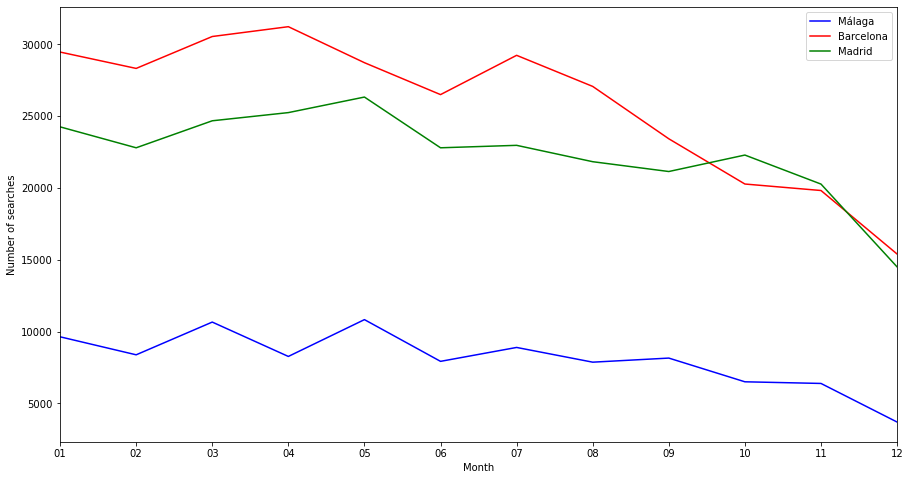

In [22]:
ax = Mal.plot(figsize = (15,8), legend = True, xlim = (0,11), xticks = list(range(13)), color = 'b',
        xlabel = 'Month', ylabel = 'Number of searches')
Bcn.plot(legend = True, color = 'r')
Mad.plot(legend = True, color = 'g')
ax.legend(['Málaga','Barcelona','Madrid'])

In [23]:
fig = ax.get_figure()
fig.savefig('Búsqueda.png')

Alternativamente, puede realizarse el ejercicio, variando ligeramente la forma, empleando el método chunksize. De ésta forma pueden obtenerse vectores con las porciones de los tres dataframes anteriores, correspondiente cada uno a una de las ciudades pedidas mediante el siguiente código, para luego concatenarlos, obteniendo idéntico resultado.

In [24]:
%%time

filename = r'C:\Users\adrgo\Downloads\searches.csv.bz2'
search = pd.read_csv(filename, sep = '^', compression='bz2', usecols = ['Date','Destination'], chunksize = 1000000)

Malaga = []
Barcelona = []
Madrid = []

for chunk in search:
        
    chunk['Month'] = chunk['Date'].str[5:7]
    
    M = chunk[chunk['Destination'] == 'AGP']
    B = chunk[chunk['Destination'] == 'BCN']
    Ma = chunk[chunk['Destination'] == 'MAD']
    
    Malaga.append(M)
    Barcelona.append(B)
    Madrid.append(Ma)

Wall time: 1min 59s


In [25]:
Malag = Malaga[0]
Barc = Barcelona[0]
Madr = Madrid[0]

for i in range(1,len(Malaga)):
    
    Malag = pd.concat([Malag, Malaga[i]])
    Barc = pd.concat([Barc, Barcelona[i]])
    Madr = pd.concat([Madr, Madrid[i]])

In [26]:
Mal = Malag['Month'].value_counts().sort_index()
Bcn = Barc['Month'].value_counts().sort_index()
Mad = Madr['Month'].value_counts().sort_index()

Por último, se grafican las curvas, ésta vez empleando la libería matplotlib, y cada una de las curvas por separado.

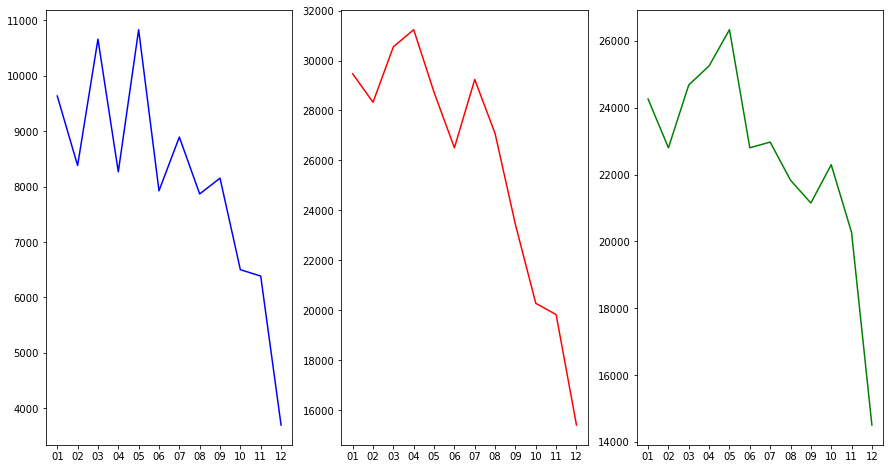

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,8))
ax1.plot(Mal, color = 'b')
ax2.plot(Bcn, color = 'r')
ax3.plot(Mad, color = 'g')

plt.savefig('Grafica.png')

# Cuarto Ejercicio

En el cuarto ejercicio se pide que se deduzca que búsquedas acabaron en reserva. 

Este ejercicio es particularmente difícil pues exige que se comparen dos archivos distintos muy amplios. Así, la manera más razonable y eficiente de llevarlo a cabo es mediante el método chunksize. Además, y dada la exigencia del ejercicio, sería conveniente comprobar la posible existencia de valores duplicados dentro de los archivos. Para ello, para cada archivo, se cargarán mediante chunks, de 2 000 000 de líneas para el archivo de búsquedas, de 1 000 000 de líneas para el archivo de reservas. Una vez hecho, mediante un bluque, se irán uniendo los diferentes chunk mediante el método append y, a cada iteración, se eliminarán los duplicados. Los resultados, de ser significativos, serán guardados, para emplearlos con posterioridad.

In [28]:
%%time

search = pd.read_csv(path_search, sep = '^', compression='bz2', chunksize = 2000000, dtype = 'str')
Search = pd.DataFrame()
for i,chunk in enumerate(search):
    print(i, len(Search))
    Search = Search.append(chunk)
    Search = Search.drop_duplicates()

Search = Search.reset_index(drop = True)
Search.to_csv(r'C:\Users\adrgo\Downloads\Searches2.csv.bz2', index = False)

0 0
1 359003
2 359003
3 359003
4 359003
5 359003
6 359003
7 359003
8 359003
9 359003
10 359003
Wall time: 4min 3s


In [29]:
%%time

booking = pd.read_csv(path_booking, sep = '^', compression='bz2', chunksize = 1000000, dtype = 'str')
Booking = pd.DataFrame()
for i,chunk in enumerate(booking):
    print(i, len(Booking))
    Booking = Booking.append(chunk)
    Booking = Booking.drop_duplicates()
    
Booking = Booking.reset_index(drop = True)
Booking.to_csv(r'C:\Users\adrgo\Downloads\Booking2.csv.bz2', index = False)

0 0
1 1000000
2 1000000
3 1000000
4 1000000
5 1000000
6 1000003
7 1000003
8 1000003
9 1000003
10 1000003
Wall time: 4min 29s


Como puede verse, hay diferencias muy importantes. En el caso del archivo de búsquedas, se reduce un $98,24\%$, mientras que en el archivo de reservas, queda reducido a apenas una décima parte de las líneas originales. Por tanto, es razonable guardar los resultados, siendo éstos mucho más sencillos de usar.

Lo que se hace a continuación es cargar cada uno de los archivos conseguidos, una vez más mediante el método chunksize y, mediante un método iterativo, limpiar en primer lugar las columnas del archivo de reservas, especialmente los espacios que hay al final de las códigos IATA de los aeropuertos en las columnas *dep_port* y *arr_port*, de salidas y llegadas, respectivamente, y crear una nueva columna únicamente con la fecha desde la columna *cre_date*, columna que indica el momento de la creación de la reserva. A continuación, mediante el método pandas.merge, se harán coincidir los datos relevantes para la hipótesis, excluyendo más adelante los índices repetidos, de forma que se pueda obtener, de forma aproximada, las búsquedas que terminaron en reserva.

Dado que no puede conocerse a ciencia cierta este dato, se tomarán unas condiciones razonablemente laxas: coincidencia en origen, destino y fecha.

In [32]:
%%time

search = pd.read_csv(r'C:\Users\adrgo\Downloads\Searches2.csv.bz2', sep = ',', compression='bz2',
                     usecols = ['Date','Origin','Destination'], chunksize = 100000)

A = []

for chunk1 in search:
    
    booking = pd.read_csv(r'C:\Users\adrgo\Downloads\Booking2.csv.bz2', sep = ',', compression='bz2',
                          usecols = ['cre_date           ','dep_port','arr_port'], chunksize = 100000)
    
    for chunk2 in booking:
        
        
        chunk2.columns = chunk2.columns.str.strip()
        chunk2['dep_port'] = chunk2['dep_port'].str.strip()
        chunk2['arr_port'] = chunk2['arr_port'].str.strip()
        chunk2['Date'] = chunk2['cre_date'].str[0:10]
        
        A.append(pd.merge(chunk2,chunk1, right_on = ['Origin','Destination','Date'],
                          left_on = ['dep_port','arr_port','Date'], left_index = True))

for i in range(len(A)):
    
    A[i] = A[i][~A[i].index.duplicated()]

A = pd.concat(A)
A = A[~A.index.duplicated()]
print(len(A))

12778
Wall time: 52.3 s


Así, se llega a la conclusión de que, aproximadamente, 12 778 búsquedas de un total de 359 003 acaban en reserva, un $3,56 \%$, atendiendo a la hipótesis planteada. Para completar el ejercicio, mediante el siguiente código, se creará una nueva columna en el archivo de búsquedas, titulada *booking*, que tendrá un 0, si es una búsqueda que no ha terminado en reserva, y 1, si sí lo ha sido.

In [33]:
Search['booking'] = 0

for i in A.index:
    
    Search['booking'][i] = 1

In [34]:
Search.to_csv('Search_final.csv.bz2', index = False)
Search[Search['booking'] == 1].sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booking
189505,2013-07-09,13:24:25,FXX,b7776bcb6f657fb24394c13ab1c2b72b,SK,VIE,DXB,1,4,VIE,...,NaN,NaN,NaN,1ASI,0,0,0,6372db43c4953abea82e1a7e5bf56260,BTS,1
121538,2013-05-02,00:04:14,FFP,314d2613218289efc5aec20eef9619f4,GB,LHR,HKG,1,2,LHR,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON,1
87177,2013-03-29,15:16:28,MPT,b478dbed931f3c13ed659ae69b1b7dfb,US,JFK,SDQ,1,2,JFK,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SFO,1
30845,2013-01-31,21:34:39,FCP,3565e31495ecfd46fa018339d20382b1,SA,AJF,RUH,0,1,AJF,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED,1
105881,2013-04-16,12:45:24,FXR,de0c7e362484c0745f5d5a1680fc01f1,RU,VOG,SVO,0,1,VOG,...,NaN,NaN,NaN,1ASI,0,0,0,ab735c85602d02fbf6975bdcf29d3b8c,PEE,1


# Quinto Ejercicio

El quinto y último ejercicio trata de crear un servicio web tal que el usuario introduzca un número $n>0$ y el servicio web devuelva un archivo json con $n$ líneas del top de aeropuertos por pasajero obtenido en el ejercicio segundo.

In [6]:
import streamlit as st
import json

In [4]:
df = pd.read_csv('topAirportsbypax.csv', usecols = ['arr_port','pax'])
df['arr_port'].head(5).tolist()

['LHR     ', 'MCO     ', 'LAX     ', 'LAS     ', 'JFK     ']

In [5]:
df['arr_port'] = df['arr_port'].str.strip()
df['arr_port'].head(5).tolist()

['LHR', 'MCO', 'LAX', 'LAS', 'JFK']

In [15]:
%%writefile app.py

st.title('Aeropuertos por pasajero')

n = st.number_input('Insertar número de aeropuertos que desea')

st.write(json.dumps(df.head(n).to_json()))

Writing app.py



  Welcome to Streamlit!

  If you're one of our development partners or you're interested in getting
  personal technical support or Streamlit updates, please enter your email
  address below. Otherwise, you may leave the field blank.

  Email: 

2020-11-23 17:00:07.176 
2020-11-23 17:00:07.177 Internal Python error in the inspect module.
Below is the traceback from this internal error.

2020-11-23 17:00:07.199 
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\click\termui.py", line 129, in prompt_func
    return f("")
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 863, in raw_input
    password=False,
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 904, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\streamlit\credentials.py", line 157, in _check_activated
    self.load(auto_resolve)
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\streamlit\credentials.py", line 133, in load
    return self.activate(show_instructions=not auto_resolve)
  File "C:\Users\adrgo\Anaconda3\lib\site-packages\streamlit\credentials.py", line 215, in activate
    text=_EMAIL_PROMPT, prompt_

TypeError: object of type 'NoneType' has no len()